<a href="https://colab.research.google.com/github/gkianfar/TIHM-Dataset-Visualization/blob/main/TIHM_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install joypy

**Clone Github repo and set working directory path**

In [2]:
!git clone https://github.com/gkianfar/TIHM-Dataset-Visualization.git
%cd /content/TIHM-Dataset-Visualization

fatal: destination path 'TIHM-Dataset-Visualization' already exists and is not an empty directory.
/content/TIHM-Dataset-Visualization


**Load packages**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
from joypy import joyplot
import matplotlib.patches as mpatches
from collections.abc import Iterable
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
from joypy import joyplot
from utils import *

%matplotlib inline
## Set colour palette
ibm_colorblind = ['#648FFF', '#FE6100', '#DC267F', '#785EF0', '#FFB000','#48A9A6']
sns.set_palette(ibm_colorblind)

**Set Data and Fig folders paths**

In [6]:
## Please change the path with the path of your dataset
DPATH = './Data'
SAVE_PATH = './Figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

**Load and preprocess dataset files**

In [9]:
## Read all tables into data_dict and generate table summaries
files = os.listdir(DPATH)
data_dict = {}
summaries = {}
for f in files:
    if 'csv' not in f:
        continue
    print(f)
    fpth = os.path.join(DPATH,f)
    df = pd.read_csv(fpth)

    for col in df.columns:
        df[col] = correct_col_type(df,col)

    if 'date' in df.columns:
        df = df.rename(columns={'date':'timestamp'})
        df['date'] = pd.to_datetime(df['timestamp'].dt.date)

    fname = f.split('.')[0]
    data_dict[fname] = df
    summaries[fname] = gen_summary(df)

for name, data in data_dict.items():
  print(f'__________________{name} data:\n ________________')
  print(f'{data.head()} \n summary: \n {summaries[name]}')
  print('________________________________________')

Activity.csv
Sleep.csv
Labels.csv
Demographics.csv
Physiology.csv
__________________Activity data:
 ________________
  patient_id location_name           timestamp       date
0      0697d   Fridge Door 2019-06-28 13:03:29 2019-06-28
1      0697d       Kitchen 2019-06-28 13:11:44 2019-06-28
2      0697d    Front Door 2019-06-28 13:13:50 2019-06-28
3      0697d       Bedroom 2019-06-28 13:13:53 2019-06-28
4      0697d   Fridge Door 2019-06-28 13:14:09 2019-06-28 
 summary: 
                      Value Type Value Number  \
patient_id     categoricaldtype           56   
location_name  categoricaldtype            8   
timestamp       datetime64dtype          NaN   
date            datetime64dtype          NaN   

                                                     Description  
patient_id                                             hash code  
location_name  Back Door,Front Door,Bedroom,Fridge Door,Bathr...  
timestamp        from 2019-04-01 00:05:46 to 2019-06-30 23:59:32  
date         

**Demographics.csv Visualization**

<Axes: title={'center': 'Distribution by Sex'}>

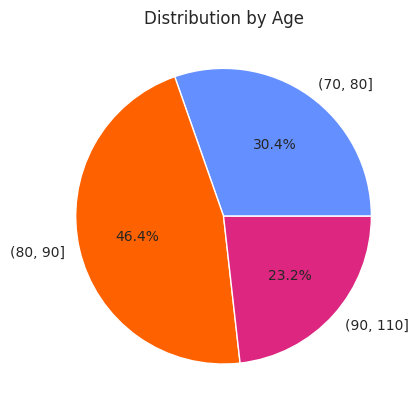

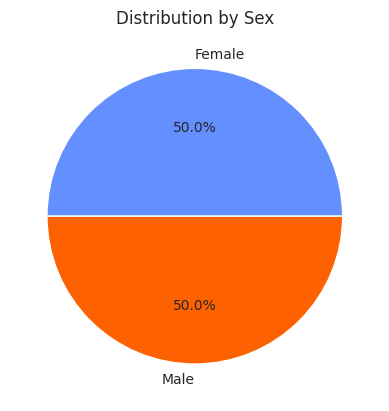

In [15]:
plt.figure()

data_dict['Demographics'].groupby('age')['patient_id'].count().plot.pie(
    ylabel='',
    autopct='%1.1f%%',
    title='Distribution by Age',
)
plt.figure()
data_dict['Demographics'].groupby('sex')['patient_id'].count().plot.pie(
    ylabel='',
    autopct='%1.1f%%',
    title='Distribution by Sex',
)

**Sleep.csv Visualization**

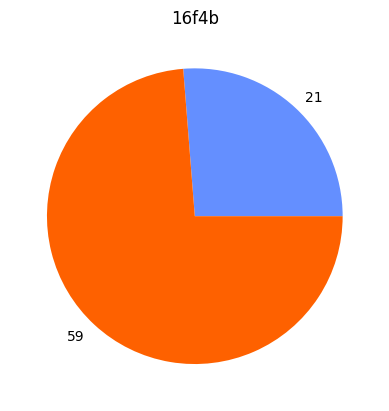

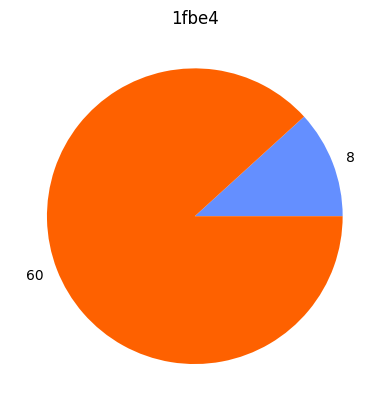

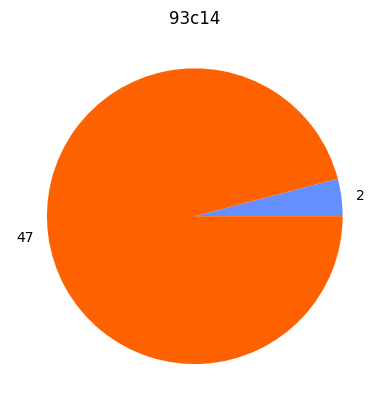

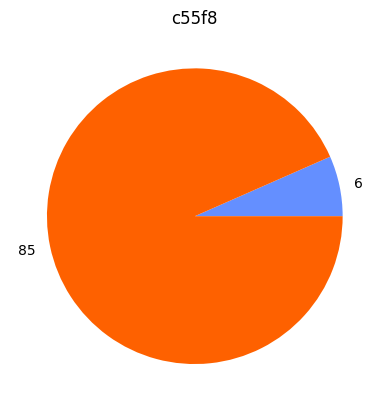

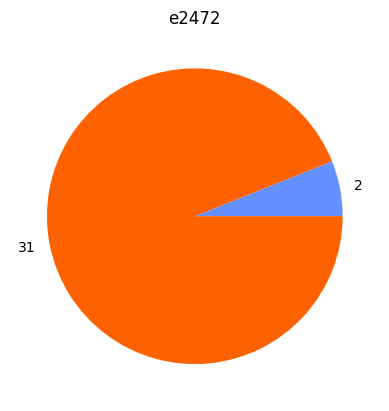

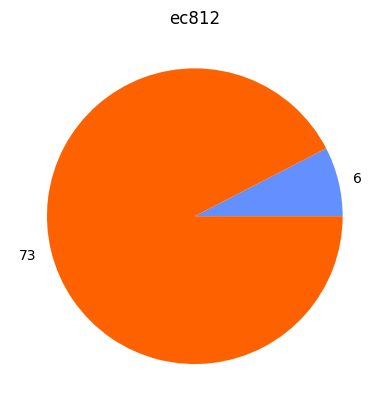

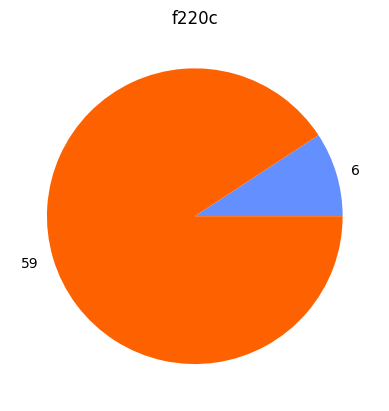

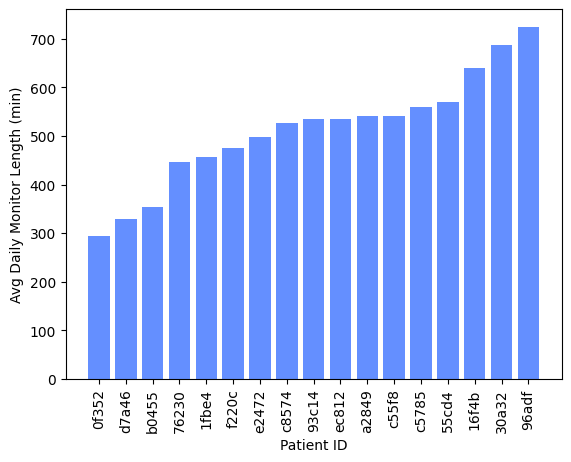

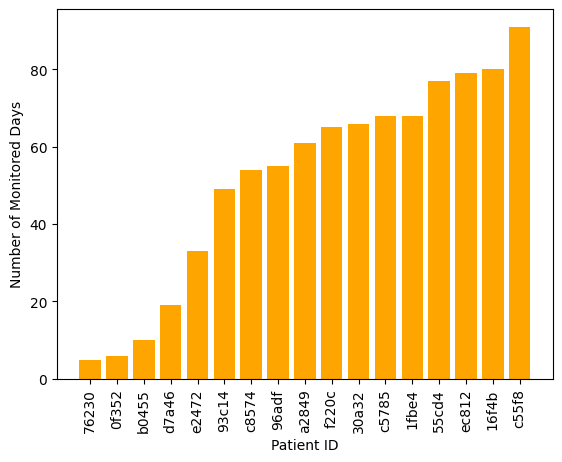

In [ ]:
monitor_avg = {}
dates_missed = {}
dates_monitored = {}

for pid in patients:
  monitor_avg[pid] = missing[pid].monitored.mean()
  dates_missed[pid] = missing[pid].loc[missing[pid]['min'].isna()].index.nunique()
  dates_monitored[pid] = missing[pid].loc[~missing[pid]['min'].isna()].index.nunique()

for pid in patients:
  if dates_missed[pid]>0:
    fig, ax = plt.subplots(1)
    ax.pie([dates_missed[pid],dates_monitored[pid]], labels=[dates_missed[pid],dates_monitored[pid]])
    ax.set_title(f'{pid}')
    fig.savefig(f'{SAVE_PATH}/{pid}_sleep_missing_pie.png')
fig, ax = plt.subplots(1)
sorted_indices = np.argsort(list(monitor_avg.values()))
x = np.array(list(monitor_avg.keys()))[sorted_indices]  # Sorted keys
y = np.array(list(monitor_avg.values()))[sorted_indices]  # Sorted values
ax.bar(x,y)
ax.set_ylabel('Avg Daily Monitor Length (min)')
ax.set_xlabel('Patient ID')
ax.set_xticks(range(len(monitor_avg.keys())),x, rotation='vertical')
fig.savefig(f'{SAVE_PATH}/sleep_daily_monitor.png')

fig, ax = plt.subplots(1)
y = []
x = []

# Populate x and y
for k, v in dates_missed.items():
    y.append(dates_monitored[k] + v)
    x.append(k)

# Convert to NumPy arrays for sorting
y = np.array(y)
x = np.array(x)
sorted_indices = np.argsort(y)
y = y[sorted_indices]
x = x[sorted_indices] # Sorted keys
ax.bar(x,y,color='orange')
ax.set_ylabel('Number of Monitored Days')
ax.set_xlabel('Patient ID')
ax.set_xticks(range(len(x)),x, rotation='vertical')
fig.savefig(f'{SAVE_PATH}/sleep_date_monitor.png')

In [11]:
patients_activity = data_dict['Activity'].patient_id.unique()
patients_physiology = data_dict['Physiology'].patient_id.unique()
patients_labels = data_dict['Labels'].patient_id.unique()
patients_sleep = data_dict['Sleep'].patient_id.unique()

total_patients = list(set(np.concatenate((patients_activity,
                                  patients_physiology,
                                      patients_labels,
                                         patients_sleep))))
num_total_patients = len(total_patients)
df = pd.DataFrame({'activity':np.zeros(num_total_patients),
                   'physiology':np.zeros(num_total_patients),
                   'labels':np.zeros(num_total_patients),
                   'sleep':np.zeros(num_total_patients)},index=total_patients)
for p in total_patients:
  df.loc[p,"activity"] = 1 if p in patients_activity else 0
  df.loc[p,"physiology"] = 1 if p in patients_physiology else 0
  df.loc[p,"labels"] = 1 if p in patients_physiology else 0
  df.loc[p,"sleep"] = 1 if p in patients_sleep else 0
df

,activity,physiology,labels,sleep
f220c,1.0,1.0,1.0,1.0
7db78,1.0,1.0,1.0,0.0
a539e,1.0,1.0,1.0,0.0
ab47a,1.0,1.0,1.0,0.0
ca44d,1.0,1.0,1.0,0.0
e87bd,1.0,1.0,1.0,0.0
b0455,1.0,1.0,1.0,1.0
c8574,1.0,1.0,1.0,1.0
e4959,1.0,1.0,1.0,0.0
b9d58,1.0,1.0,1.0,0.0


**Activity.csv Visualization**

Text(0, 0.5, 'Number of Paticipants')

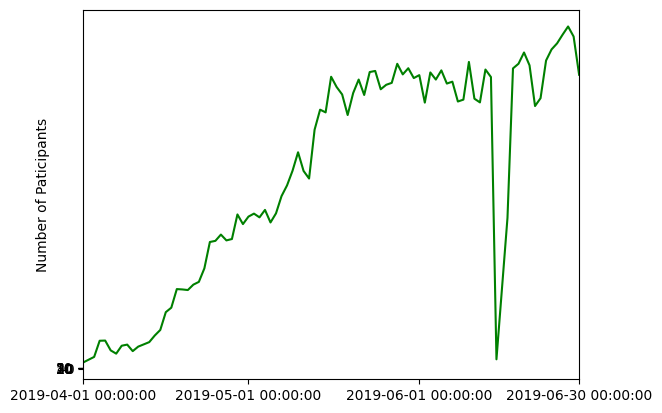

In [12]:
## Visualise number of paticipants with time
p_ct=data_dict['Activity'].groupby('date').agg(size=('patient_id','size'))
plt.figure()
plt.plot(p_ct,color='g')
idx = [0,29,60,88]
plt.xticks(p_ct.index[idx],labels=p_ct.index[idx])

plt.xlim(p_ct.index[0],p_ct.index[-1])
plt.yticks(np.arange(0,60,10))
plt.ylabel('Number of Paticipants')

**Physiology.csv Visualization**

<Axes: xlabel='device_type'>

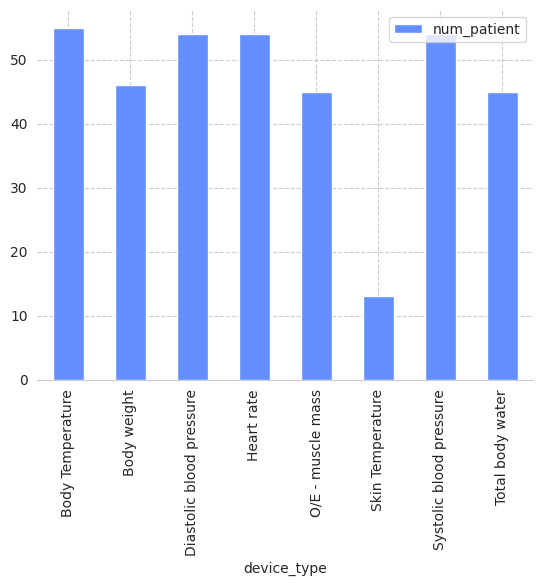

In [20]:
def count_patient(x):
  return x.nunique()
physio_df = data_dict['Physiology']
physio_df.groupby('device_type').agg(num_patient=('patient_id',count_patient)).plot.bar()

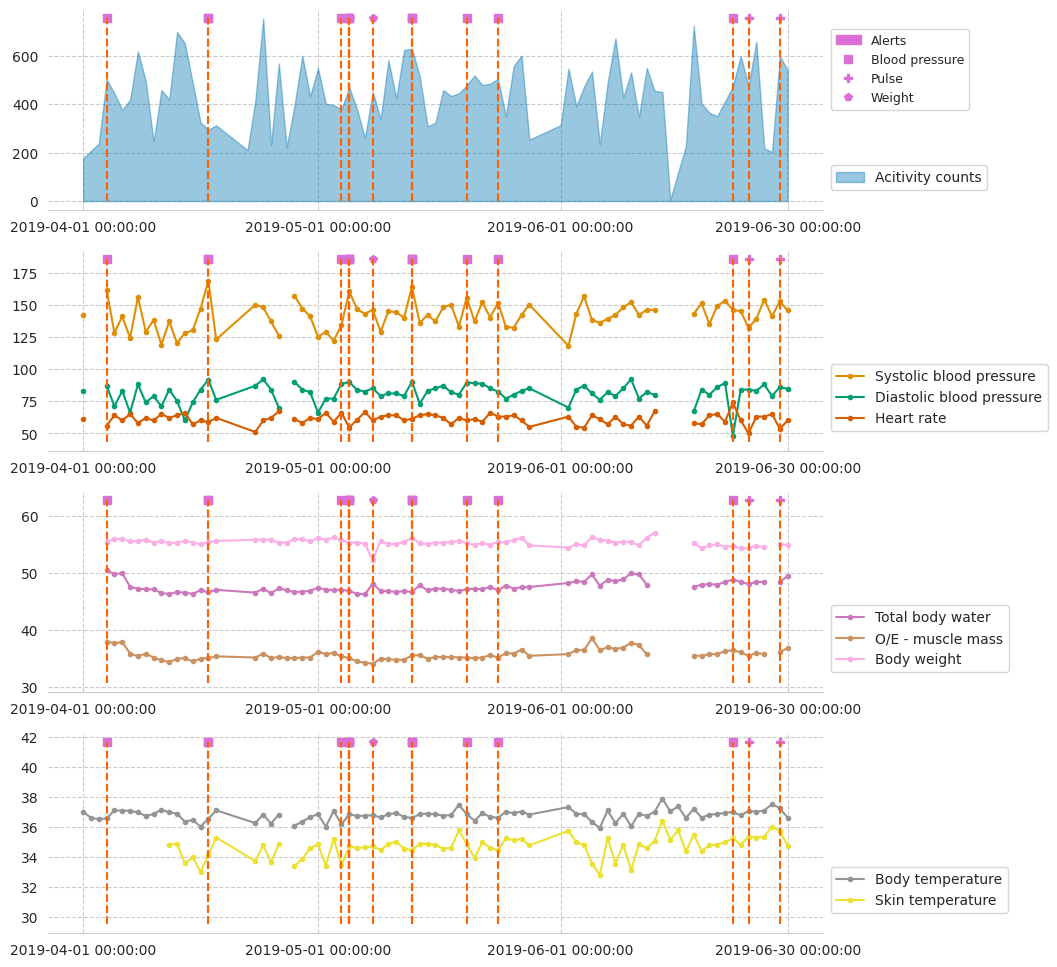

In [16]:
## Visualize Physiology measurements align with labels for an individual participant
pgrps = {'pgrp1': ['Systolic blood pressure','Diastolic blood pressure', 'Heart rate'],
            'pgrp2' : ['O/E - muscle mass', 'Total body water', 'Body weight'],
            'pgrp3' : [ 'Skin temperature','Body temperature']}
numerical_cols = data_dict['Physiology'].select_dtypes(include=[np.number]).columns
phys = data_dict['Physiology'].groupby(['patient_id','date','device_type'])[numerical_cols].agg('max')
phys.drop(phys.loc[phys.sum(axis=1)==0].index,axis=0,inplace=True)
phys.reset_index(inplace=True)
x_idx = phys.groupby('date')[phys.select_dtypes(include=['number']).columns].mean().index


vis_personal_aligned_multiview_day_plot(sleep_df=None,
                                        act_df=data_dict['Activity'],
                                        phys_df=data_dict['Physiology'],
                                        pgrps=pgrps,
                                        pid='c55f8',
                                        save_path=SAVE_PATH,
                                        labels_df=data_dict['Labels'],
                                        ftype='pdf',xticks=x_idx[[0,30,61,90]])

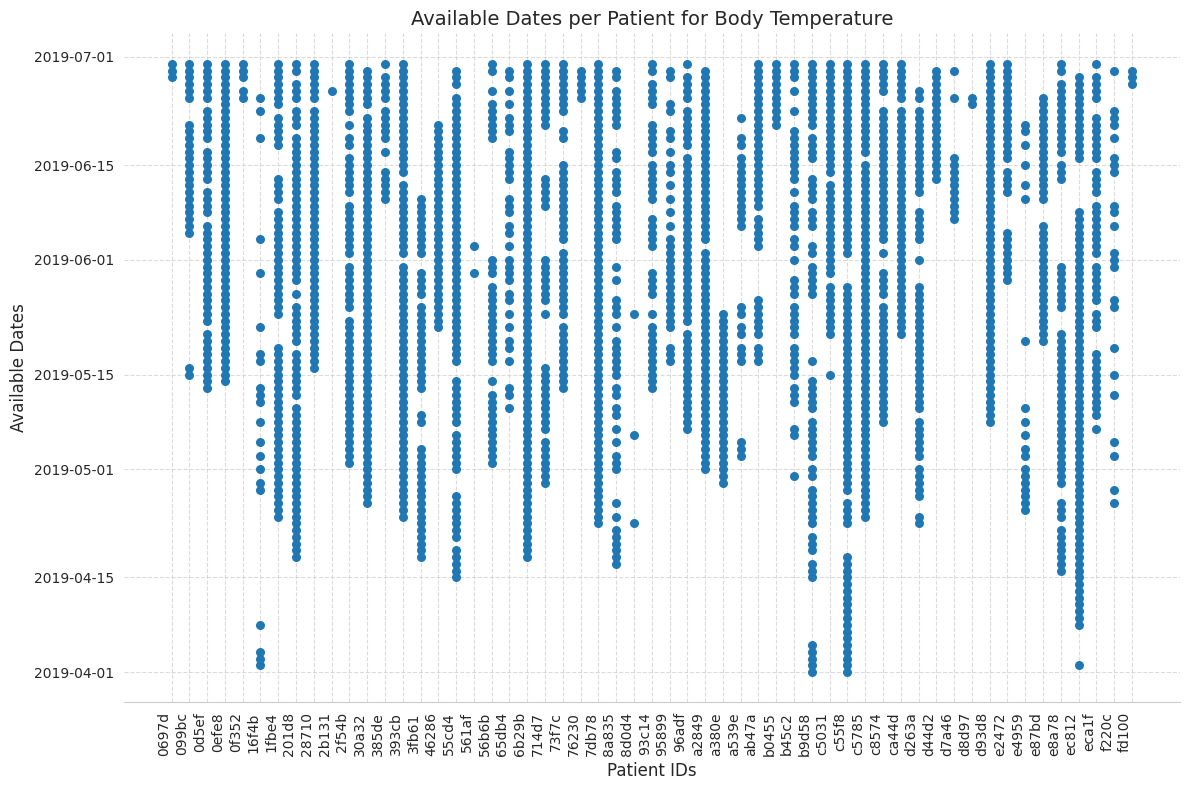

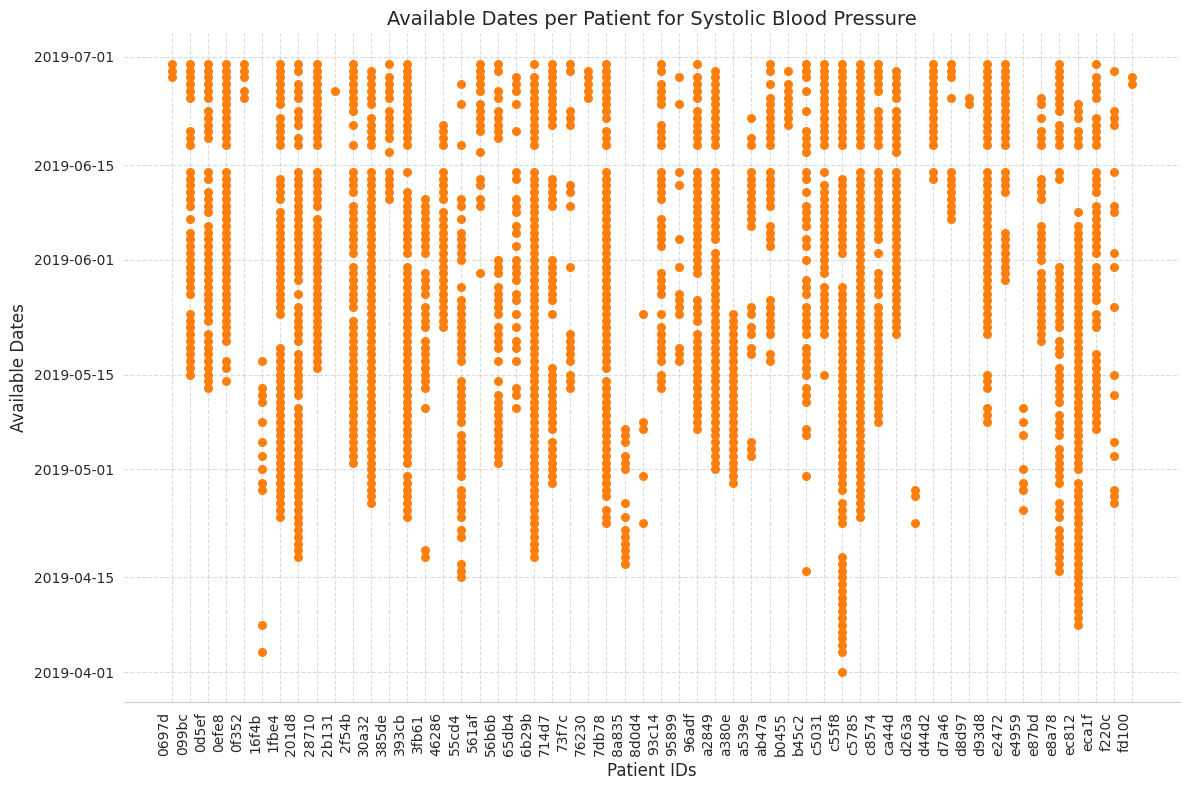

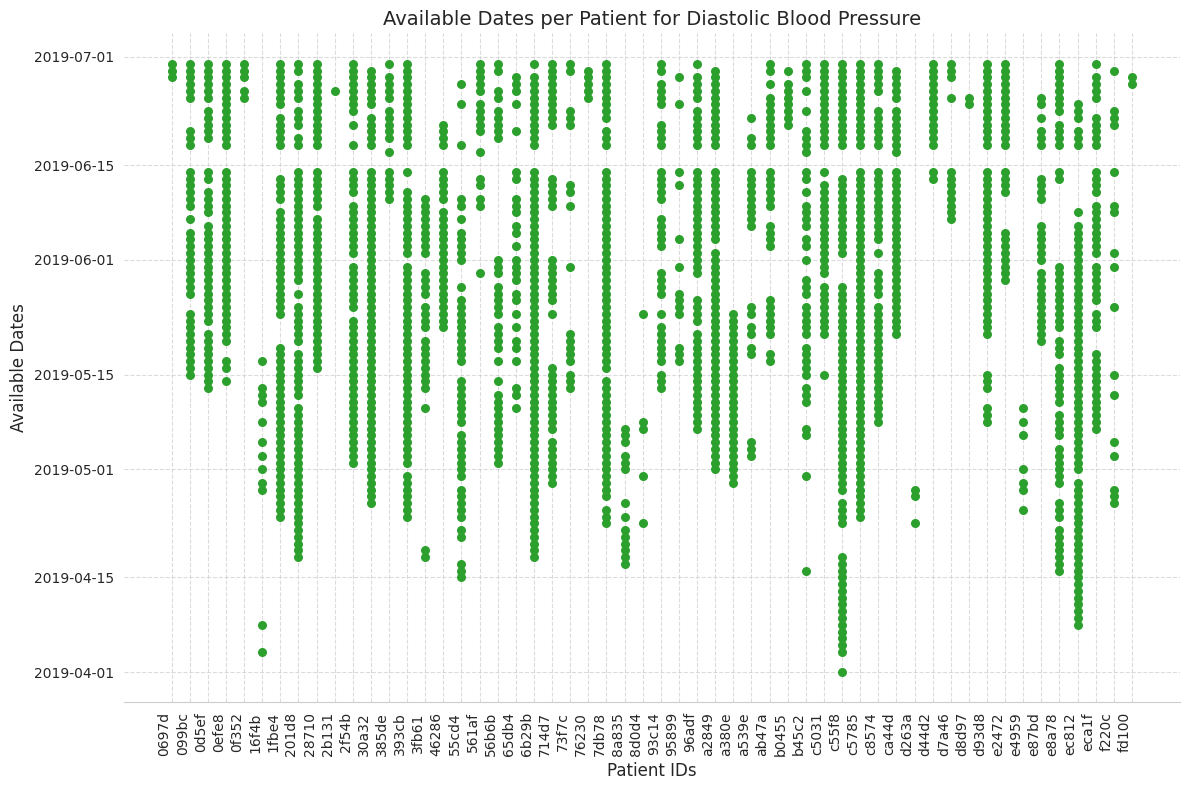

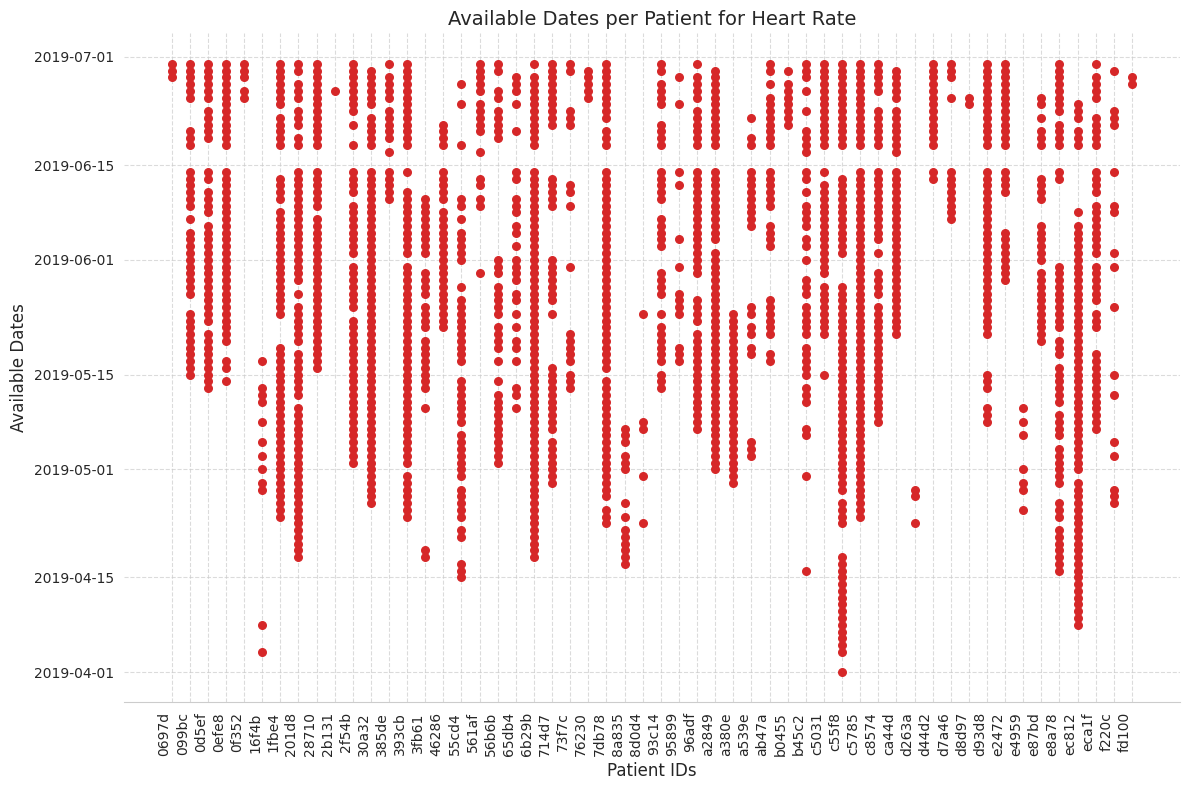

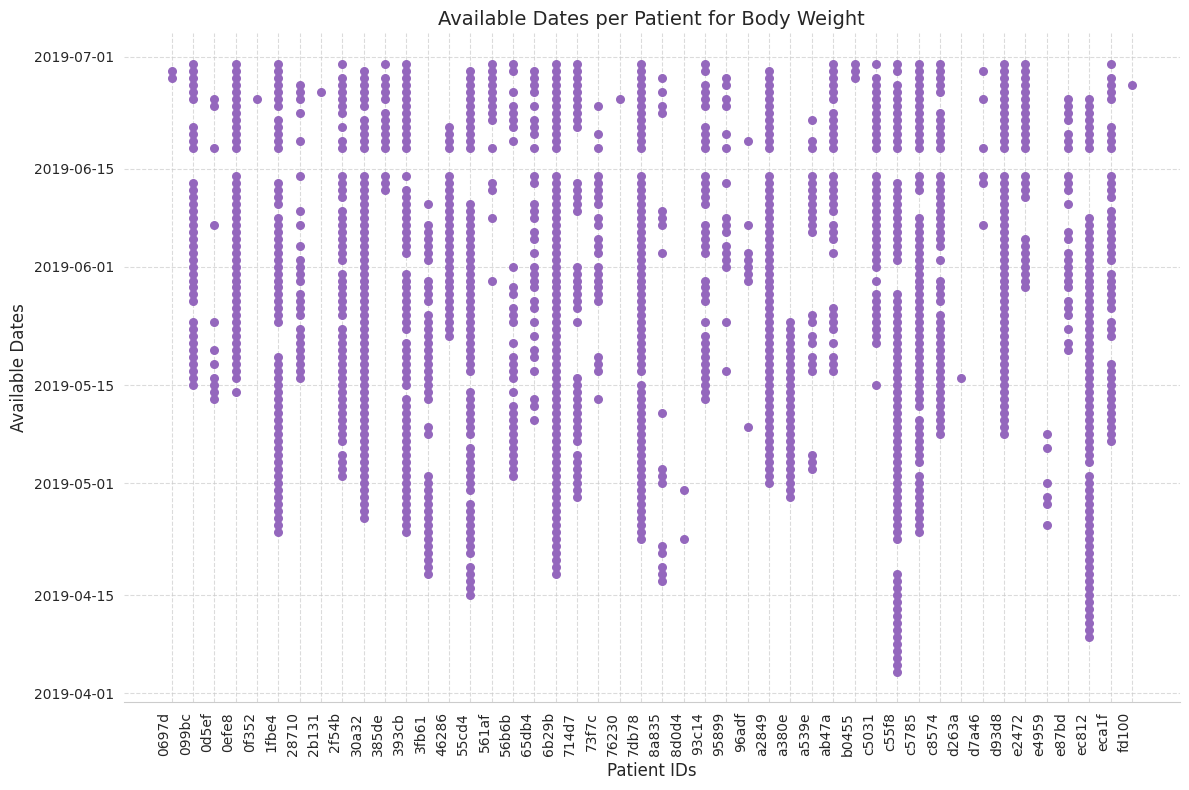

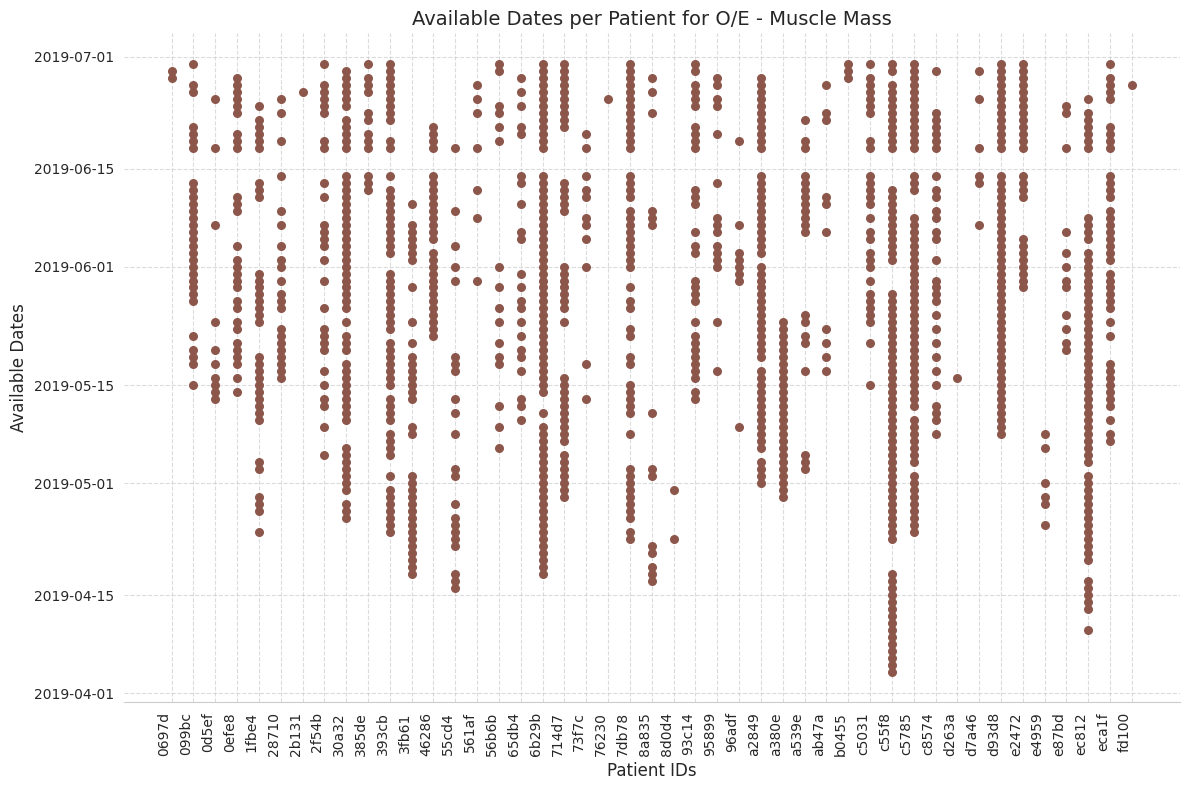

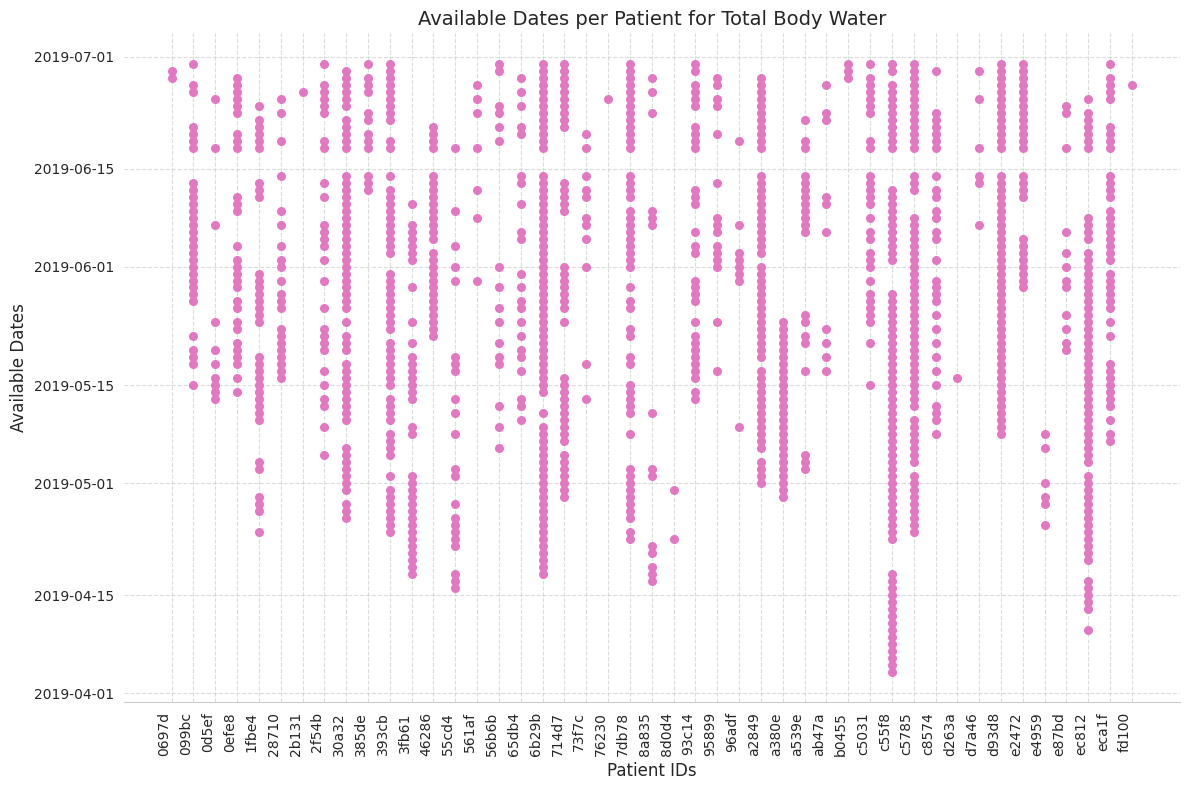

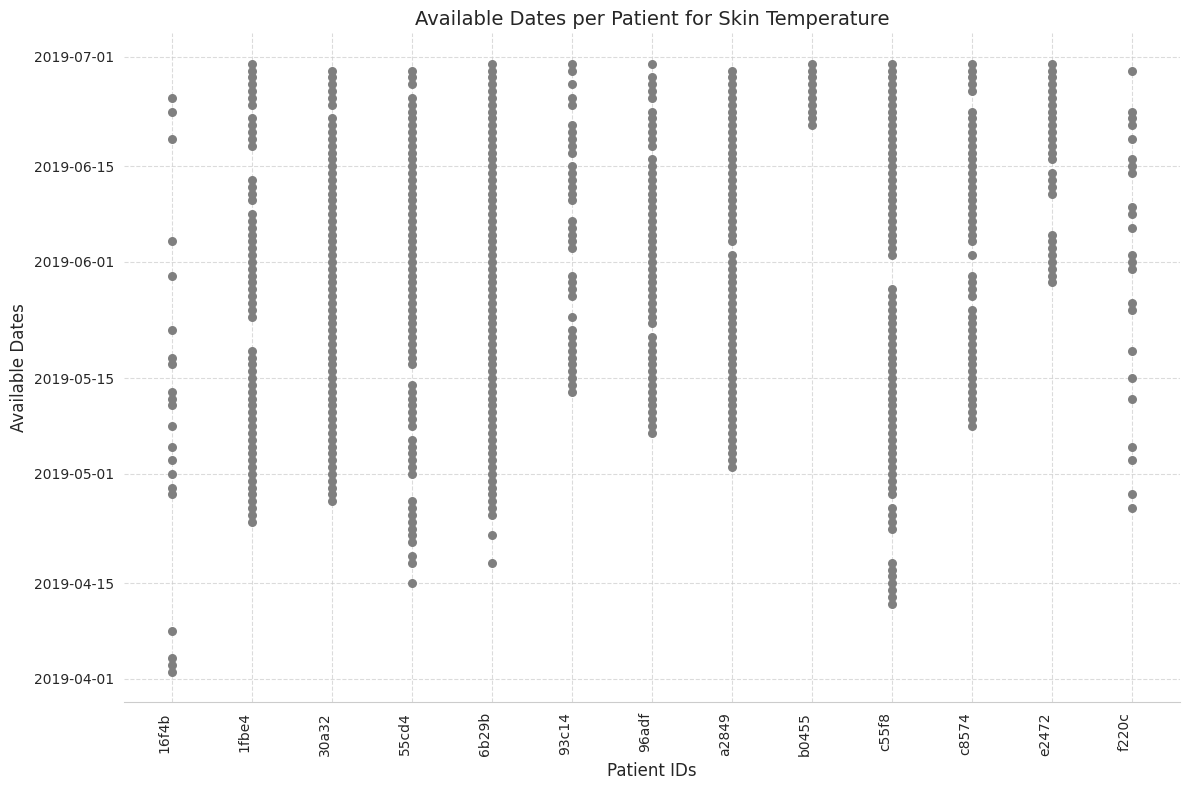

In [21]:
import pandas as pd

avai_dates = {}
patients = data_dict['Physiology'].patient_id.unique()
for pid in patients:

  # Assuming 'data_dict' and 'get_personal_df' are defined earlier
  df = get_personal_df(data_dict['Physiology'],pid).copy()
  #print(df.date)
  date_min = df.date.min()
  date_max = df.date.max()
  #print(f'{pid} min {date_min}')
  #print(f'max{date_max}')
  date_range = pd.date_range(start=date_min,end=date_max,freq='1D')
  avai_dates_p = {}
  for d in df.device_type.unique():
    date_device = df.loc[df['device_type']==d].date.unique()
    avai_dates_p[d] = date_device.tolist()  # Available dates
  avai_dates[pid] = avai_dates_p

# Create the plot figure

devices = data_dict['Physiology'].device_type.unique()  # Unique device types
colors = plt.cm.tab10.colors  # A colormap for assigning colors

# Loop through each device type
for i, d in enumerate(devices):

    fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for better visualization

    data = {}
    for pid in patients:
        if d in avai_dates[pid].keys():
            data[pid] = avai_dates[pid][d]  # Collect avai dates for each patient-device pair

    # Prepare data for plotting
    patient_ids = list(data.keys())
    avai_dates_list = [avai_dates[pid][d] for pid in patient_ids]  # List of missed dates for each patient

    # Flatten the list of avai dates to plot each date individually
    all_patient_ids = []
    all_avai_dates = []

    for pid, avai_dates_for_pid in zip(patient_ids, avai_dates_list):
        all_patient_ids.extend([pid] * len(avai_dates_for_pid))  # Repeat patient ID for each missed date
        all_avai_dates.extend(avai_dates_for_pid)  # Flatten avai dates

    # Scatter plot for the current device
    ax.scatter(
        all_patient_ids,
        all_avai_dates,
        color=colors[i % len(colors)],
        label=d,
        s=30  # Adjust point size for better visibility
    )

    # Set axis labels and title
    ax.set_xlabel('Patient IDs', fontsize=12)
    ax.set_ylabel('Available Dates', fontsize=12)
    ax.set_title(f'Available Dates per Patient for {d.title()}', fontsize=14)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90, ha='right')

    # Display grid and adjust layout
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    if d == 'O/E - muscle mass':
      d = 'muscle mass'
    plt.savefig(f'{SAVE_PATH}{d}.png')
    plt.show()
